# Type 1: the decision making stage

In [4]:
import remeta
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Confidence is regarded as a *metacognitive variable* and thus identifies as a *mental representation of another mental representation*. In the case of confidence, the *other mental representation* is the decision variable that guided our original decision about which we are about to express a sense of confidence. As a consequence, a good model of confidence needs to model the construction of the decision variable — the **type 1 stage** — as precisely as possible.

:::{figure} img/model_type1.png
:align: center
:width: 65%
:::

Central to the type 1 stage is the psychometric function which describes the relationship between the stimulus variable $x$ and choice probability $p^+(x)$ for the positive stimulus category $S^+$. By default, ReMeta uses a Gaussian type 1 noise model:

$$
p^+(x) =  \Phi\left(\frac{x+\delta_1}{\sigma_1}\right)
$$

The default psychometric curve in ReMeta is characterized by two parameters, $\sigma_1$, which reflects **type 1 noise**, and $\delta_1$, which reflects the **type 1 bias**.

In addition, ReMeta includes a threshold parameter, representing a minimal stimulus intensity that is required to drive any response in the observer:

$$
p^+(x) =  \begin{cases} \Phi\left(\frac{x+\delta_1}{\sigma_1}\right) & |x| \ge \vartheta_1 \\ \Phi\left(\frac{\delta_1}{\sigma_1}\right) & |x| < \vartheta_1 \end{cases}
$$

The following sections describe the type 1 parameters available in ReMeta.

## Default parameters

### Type 1 noise

|Parameter|Symbol|How to enable|Default|Possible values|
|--|--|--|--|--|
|`type1_noise`|$\sigma_1$|`cfg.param_type1_noise.enable = 1`|`1`|`0`, `1`, `2`|

In ReMeta, type 1 noise reflects noise that is present either in the stimulus or in the decision process. The associated parameter $\sigma_1$ reflects the standard deviation of the underlying type 1 noise process. Lower $\sigma_1$ means lower stimulus/decision noise, hence a more sensitive observer and a steeper psychometric curve. Higher $\sigma_1$ means higher stimulus/decision noise, hence a less sensitive observer and a flatter psychometric curve.

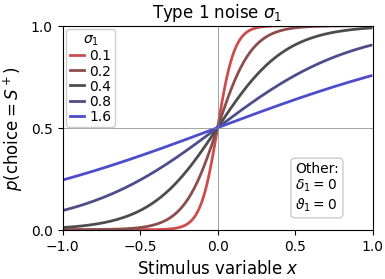

In [5]:
from IPython.display import Image, display
display(Image(filename='img/type1_parameters_noise.png'))

Every ReMeta model must fit type1 noise, hence it cannot be disabled. However, ReMeta allows separate type 1 noise estimates for the two stimulus categories by setting `cfg.enable_param_type1_noise = 2`. See below for an example of a psychometric curve with stimulus-category-dependent type 1 noise.

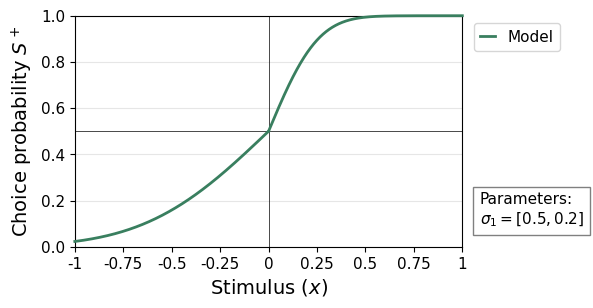

In [6]:
remeta.plot_psychometric(type1_noise=[0.5, 0.2])

By default, the type 1 model assumes a normal distribution for type 1 noise (`cfg.param_type1_noise.model = 'normal'`). However, for some decisional processes a logistic noise model may be more approprtiate `cfg.param_type1_noise.model = 'logistic'`. 

To appreciate the difference between normal and logistic noise models, consider a random dot kinematogram in which observers have to judge whether the dominant direction of motion is left or right. Is observers choose the direction of motion based on the difference between the *average response* of right-tuned versus the *average response* of left-tuned neurons, then a normal noise model would typically be appropriate.

If they choose the direction based on the *maximum response* of right-tuned versus the *maximum response* of left-tuned neurons, then a logistic noise model may be more appropriate.

The logistic distribution (kurtosis 4.2) is is tail-heavier than the normal distribution (kurtosis 3):

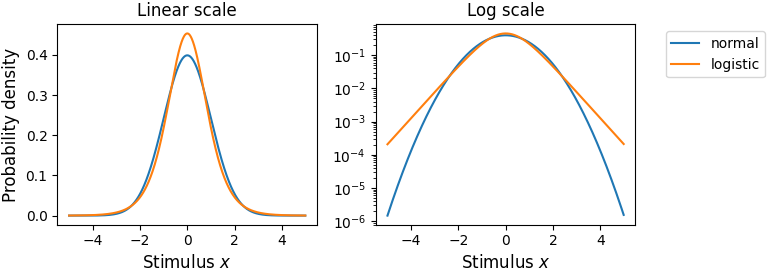

In [11]:
from IPython.display import Image, display
display(Image(filename='img/normal_versus_logistic.png'))

### Type 1 bias

|Parameter|Symbol|How to enable|Default|Possible values|
|--|--|--|--|--|
|`type1_bias`|$\delta_1$|`cfg.param_type1_bias.enable = 1`|`1`|`0`, `1`|

The type 1 bias may either be perceptual or decisional in nature and leads to a horizontal shift of the psychometric function. A negative bias indicates a preference for $S^-$ and thus a right-ward shift of the curve. A positive bias indicates a preference for $S^+$ and thus a left-ward shift of the curve.

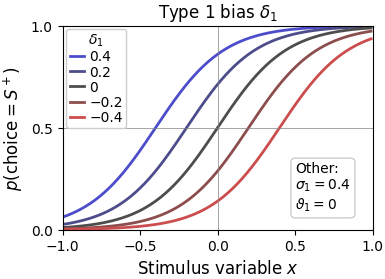

In [7]:
display(Image(filename='img/type1_parameters_bias.png'))

Note that while setting `cfg.param_type1_bias.enable = 2`, i.e. different biases per stimulus category, is theoretically possible, it is discouraged, as it defeats the interpretation of a bias parameter and leads to a discontinuity at the stimulus boundary.

## Additional parameters

### Type 1 threshold

|Parameter|Symbol|How to enable|Default|Possible values|
|--|--|--|--|--|
|`type1_bias`|$\vartheta_1$|`cfg.param_type1_bias.enable = 1`|`0`|`0`, `1`, `2`|

A threshold parameter describes the minimum amount of evidence to elicit any change in choice probability. It is not enabled by default and is mostly useful if an experiment includes many stimuli around the threshold of conscious awareness.

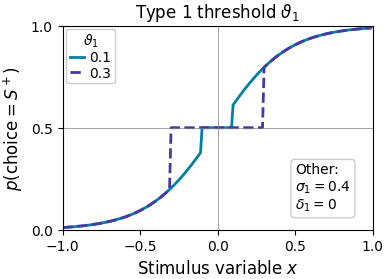

In [8]:
display(Image(filename='img/type1_parameters_thresh.png'))

Type 1 thresholds can be fitted per stimulus category. See below for an example of an associated psychometric curve.

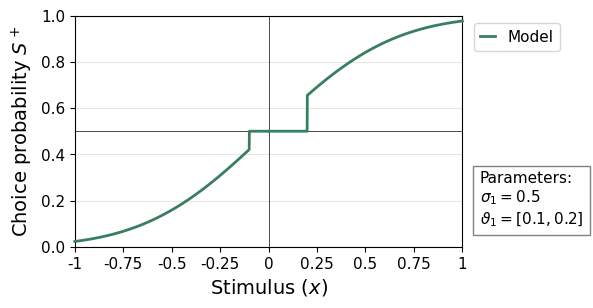

In [9]:
remeta.plot_psychometric(type1_noise=0.5, type1_thresh=[0.1, 0.2])

### Type 1 nonlinear encoding

|Parameter|Symbol|How to enable|Default|Possible values|
|--|--|--|--|--|
|`type1_nonlinear_gain`|$\kappa_1$|`cfg.param_type1_nonlinear_gain.enable = 1`|`0`|`0`, `1`, `2`|
|`type1_nonlinear_scale`|$\tau_1$|`cfg.param_type1_nonlinear_scale.enable = 1`|`0`|`0`, `1`, `2`|

Most models of binary choices assume a linear relationship between stimulus intensity as defined by the modeler and stimulus intensity as encoded in the nervous system. While this assumption is certainly  {u}`not` warranted, from a pragmatic standpoint it is understandable. Not because of a lack of formalism, but due to the fact that the loss of information through binary choices makes an estimate of underlying nonlinearities a daunting task.

Nevertheless, in ReMeta, nonlinearities can be accouted for with two parameters, `type1_nonlinear_gain` ($\kappa_1$) and `type1_nonlinear_scale` ($\tau_1$):

$$
x'=x\left(1+\kappa_1\,\frac{(x/\tau_1)^2}{1+(x/\tau_1)^2}\right)
$$

The chosen nonlinearity has a few favorable properties, including the fact that it's first derivative equals $1$ at $x = 0$ (i.e. it does not change the sensitivity of the psychometric function) and it is approximately linear for small $x$. See below for the effects of both nonlinearity parameters.

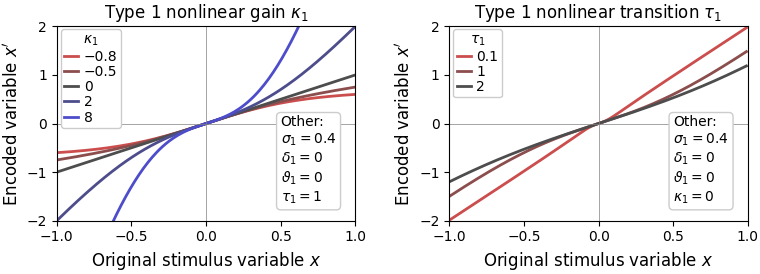

In [ ]:
display(Image(filename='img/type1_parameters_nonlinear_stimtrans.png'))

A few practical recommendations:

- For most scenarios, leave these parameters disabled. Both parameters require very large numbers of samples to yield sufficiently precise estimates.
- If you consider modeling nonlinearities, we recommend to only fit the gain parameter (i.e. `cfg.param_type1_nonlinear_gain.enable = 1`). In this case, the scale parameter set to the maximum stimulus intensity by default. To change the default scale parameter, use `cfg.param_type1_nonlinear_scale.default`.
- If you consider modeling nonlinearities, we strongly recommend to fit these parameters as [group parameters](group_estimation_priors.ipynb) to utilize as many samples as possible. Even with 2000 samples per observer, both parameter estimates will be all over the place.